# Covid-19 Fatality Prediction

## Overview

Binary classification machine learning prediction model

Predict whether a Covid-19 patient will die or not based on their features.<br>
If a patient has a 50% or higher prediction of dying, then that person is high risk. <br>
If a patient has less than a 50% prediction of dying, then that person is low risk. 

Problem definition: Given clinical parameters about a Covid-19 patient, can we predict whether or not they will die?

Evaluation: If we can reach 90% accuracy at predicting whether or not a patient will die during the proof of concept, we'll pursue the project.

STEPS
1. Explore data
2. Choose features
3. Create models 
4. Test and choose model
5. Test and improve model

## Data source

This model will use a Kaggle dataset created from reports by Korea Centers for Disease Control and Prevention and local governments. It is maintained and updated by volunteers.

Specifically, the PatientInfo.csv, which contains epidemiological data of Covid-19 patients in South Korea, is used.

Source
- https://www.kaggle.com/kimjihoo/coronavirusdataset
- https://github.com/ThisIsIsaac/Data-Science-for-COVID-19
- http://www.cdc.go.kr/

### Data dictionary

See detailed descript of the dataset here: <br>
https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description


## Data exploration / analysis (EDA)

What's missing from the data, and how do you deal with it?<br>
Are there any outliers?<br>
Do you need to add, change or remove columns?

In [3]:
# Do all imports at the top

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
# LOAD DATA
# Create dataframe with pandas

df = pd.read_csv("PatientInfo.csv")

# Number of (rows, columns)
df.shape 

(3253, 18)

### EXPLORE DATA

In [5]:
# Preview table
df.head() # first 5 rows

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [6]:
# Look at column info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3253 non-null   int64  
 1   global_num          2082 non-null   float64
 2   sex                 3200 non-null   object 
 3   birth_year          2833 non-null   float64
 4   age                 3192 non-null   object 
 5   country             3142 non-null   object 
 6   province            3253 non-null   object 
 7   city                3177 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2441 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         763 non-null    float64
 12  contact_number      597 non-null    float64
 13  symptom_onset_date  462 non-null    object 
 14  confirmed_date      3253 non-null   object 
 15  released_date       1137 non-null   object 
 16  deceas

In [10]:
# Column datatype
df.dtypes

patient_id              int64
global_num            float64
sex                    object
birth_year            float64
age                    object
country                object
province               object
city                   object
disease                object
infection_case         object
infection_order       float64
infected_by           float64
contact_number        float64
symptom_onset_date     object
confirmed_date         object
released_date          object
deceased_date          object
state                  object
dtype: object

In [7]:
# Check for missing values
df.isna().sum()

# 3253 rows
# Columns with lots of nulls
# global_num / birth_year / disease / infection_case / infection_order
# infected_by / contact_number / symptom_onset_date
# released_date / deceased_date

# 1. disease 2. infection order 3. deceased_date

patient_id               0
global_num            1171
sex                     53
birth_year             420
age                     61
country                111
province                 0
city                    76
disease               3235
infection_case         812
infection_order       3222
infected_by           2490
contact_number        2656
symptom_onset_date    2791
confirmed_date           0
released_date         2116
deceased_date         3193
state                    0
dtype: int64

In [23]:
# View column
# df["released_date"]

# Drop column
df = df.drop("released_date", axis=1)
# df = df.drop('column_name', 1)
# df.drop('column_name', axis=1, inplace=True) // use inplace if you don't want to reassign

NameError: name 'patient_id' is not defined

In [24]:
# List of columns 
df.columns

Index(['patient_id', 'global_num', 'sex', 'birth_year', 'age', 'country',
       'province', 'city', 'disease', 'infection_case', 'infection_order',
       'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date',
       'deceased_date', 'state'],
      dtype='object')

### MANIPULATE DATASET - DROP COLUMNS

In [27]:
# df.head()
# df.isna().sum()

# Drop column
df = df.drop("infection_order", axis=1)

In [29]:
df = df.drop("disease", axis=1)
df = df.drop("infected_by", axis=1)
df = df.drop("contact_number", axis=1)
df = df.drop("symptom_onset_date", axis=1)
df = df.drop("deceased_date", axis=1)

In [37]:
# df.head()
# df.isna().sum()
df = df.drop("global_num", axis=1)

In [53]:
# FIND OUT HOW MANY OPTIONS THERE ARE IN INFECTION_CASE

df['country'].value_counts()

Korea            3118
China              10
United States       6
Thailand            2
Indonesia           1
Canada              1
Mongolia            1
Switzerland         1
France              1
Spain               1
Name: country, dtype: int64

In [54]:
df = df.drop("birth_year", axis=1)
df = df.drop("confirmed_date", axis=1)
df = df.drop("city", axis=1)

In [57]:
# Export dataframe with dropped columns

df.to_csv("PatientInfo_Clean1.csv", index=False) 

### MANIPULATE DATASET - DELETE ROWS W/ NULL VALUES

In [59]:
# DELETE ROWS WITH NULL VALUES

# df.isna().sum()
df.dropna(inplace=True)

In [62]:
# df.shape // (2319, 7)
df.isna().sum()

patient_id        0
sex               0
age               0
country           0
province          0
infection_case    0
state             0
dtype: int64

In [63]:
# EXPORT DATAFRAME WITH NO NULL VALUES

df.to_csv("PatientInfo_Clean2.csv", index=False)

### CONVERT COLUMNS W/ STRINGS TO NUMBERS

In [66]:
# CONVERT STRING VALUES TO NUMBERS

# https://stackoverflow.com/questions/31848877/how-to-replace-string-values-in-pandas-dataframe-to-integers
# https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
# https://www.tutorialspoint.com/replacing-strings-with-numbers-in-python-for-data-analysis
# https://martinhjelm.github.io/2017/11/12/Pandas-Replacing-Strings-In-A-Column/ <-- 
# https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/

# CONVERT SEX TO NUMBERS

# Create list of unique options
sex_options = df['sex'].unique().tolist()
# sex_options
# Returns ['male', 'female']

# Create dictionary mapping strings to numbers 
sex_mapping = dict( zip( sex_options, range( len(sex_options) ) ) )
# sex_mapping
# Returns {'male': 0, 'female': 1}

# In-place replacement of strings to numbers 
df.replace({'sex': sex_mapping}, inplace=True)
df.head()

,patient_id,sex,age,country,province,infection_case,state
0,1000000001,0,50s,Korea,Seoul,overseas inflow,released
1,1000000002,0,30s,Korea,Seoul,overseas inflow,released
2,1000000003,0,50s,Korea,Seoul,contact with patient,released
3,1000000004,0,20s,Korea,Seoul,overseas inflow,released
4,1000000005,1,20s,Korea,Seoul,contact with patient,released


In [72]:
df['age'].value_counts()

20s     533
50s     417
40s     355
30s     337
60s     280
70s     138
10s     102
80s      92
0s       40
90s      24
100s      1
Name: age, dtype: int64

In [74]:
# CONVERT AGE TO NUMBERS

age_dict = {'0s': 0, '10s': 1, '20s': 2, '30s': 3, '40s': 4, '50s': 5, '60s': 6, '70s': 7, 
            '80s': 8, '90s': 9, '100s': 10}

df['age'] = [age_dict[key] for key in df['age']]

df.head()

,patient_id,sex,age,country,province,infection_case,state
0,1000000001,0,5,Korea,Seoul,overseas inflow,released
1,1000000002,0,3,Korea,Seoul,overseas inflow,released
2,1000000003,0,5,Korea,Seoul,contact with patient,released
3,1000000004,0,2,Korea,Seoul,overseas inflow,released
4,1000000005,1,2,Korea,Seoul,contact with patient,released


In [78]:
# CONVERT COUNTRY TO NUMBERS

country_options = df['country'].unique().tolist()

country_mapping = dict( zip( country_options, range( len(country_options) ) ) )
country_mapping
"""
{'Korea': 0,
 'China': 1,
 'United States': 2,
 'France': 3,
 'Thailand': 4,
 'Canada': 5,
 'Switzerland': 6,
 'Indonesia': 7,
 'Mongolia': 8,
 'Spain': 9}
"""

df.replace({'country': country_mapping}, inplace=True)
df.head()

,patient_id,sex,age,country,province,infection_case,state
0,1000000001,0,5,0,Seoul,overseas inflow,released
1,1000000002,0,3,0,Seoul,overseas inflow,released
2,1000000003,0,5,0,Seoul,contact with patient,released
3,1000000004,0,2,0,Seoul,overseas inflow,released
4,1000000005,1,2,0,Seoul,contact with patient,released


In [83]:
# CONVERT PROVINCE TO NUMBERS

province_options = df['province'].unique().tolist()

province_mapping = dict( zip( province_options, range( len(province_options) ) ) )
province_mapping
"""
{'Seoul': 0,
 'Busan': 1,
 'Daegu': 2,
 'Gwangju': 3,
 'Incheon': 4,
 'Daejeon': 5,
 'Ulsan': 6,
 'Sejong': 7,
 'Gyeonggi-do': 8,
 'Gangwon-do': 9,
 'Chungcheongbuk-do': 10,
 'Chungcheongnam-do': 11,
 'Jeollabuk-do': 12,
 'Jeollanam-do': 13,
 'Gyeongsangbuk-do': 14,
 'Gyeongsangnam-do': 15,
 'Jeju-do': 16}
"""

df.replace({'province': province_mapping}, inplace=True)
df.head()

,patient_id,sex,age,country,province,infection_case,state
0,1000000001,0,5,0,0,overseas inflow,released
1,1000000002,0,3,0,0,overseas inflow,released
2,1000000003,0,5,0,0,contact with patient,released
3,1000000004,0,2,0,0,overseas inflow,released
4,1000000005,1,2,0,0,contact with patient,released


In [85]:
# CONVERT INFECTION CASE TO NUMBER

infection_case_options = df['infection_case'].unique().tolist()

infection_case_mapping = dict( zip( infection_case_options, range( len(infection_case_options) ) ) )
infection_case_mapping
"""
{'overseas inflow': 0,
 'contact with patient': 1,
 'Seongdong-gu APT': 2,
 'etc': 3,
 "Eunpyeong St. Mary's Hospital": 4,
 'Shincheonji Church': 5,
 'Dongan Church': 6,
 'Guro-gu Call Center': 7,
 'Onchun Church': 8,
 'Cheongdo Daenam Hospital': 9,
 'Suyeong-gu Kindergarten': 10,
 'Ministry of Oceans and Fisheries': 11,
 'gym facility in Cheonan': 12,
 'gym facility in Sejong': 13,
 'River of Grace Community Church': 14,
 'Gyeongsan Seorin Nursing Home': 15,
 'Gyeongsan Cham Joeun Community Center': 16,
 'Gyeongsan Jeil Silver Town': 17,
 'Bonghwa Pureun Nursing Home': 18,
 'Pilgrimage to Israel': 19,
 'Milal Shelter': 20,
 'Geochang Church': 21,
 'Changnyeong Coin Karaoke': 22}
"""

df.replace({'infection_case': infection_case_mapping}, inplace=True)
df.head()

,patient_id,sex,age,country,province,infection_case,state
0,1000000001,0,5,0,0,0,released
1,1000000002,0,3,0,0,0,released
2,1000000003,0,5,0,0,1,released
3,1000000004,0,2,0,0,0,released
4,1000000005,1,2,0,0,1,released


In [86]:
# CONVERT STATE TO NUMBER

# Convert 'released' and 'isolated' to alive (0), and 'deceased' to dead (1)
state_dict = {'released': 0, 'isolated': 0, 'deceased': 1}

df['state'] = [state_dict[key] for key in df['state']]

df.head()

,patient_id,sex,age,country,province,infection_case,state
0,1000000001,0,5,0,0,0,0
1,1000000002,0,3,0,0,0,0
2,1000000003,0,5,0,0,1,0
3,1000000004,0,2,0,0,0,0
4,1000000005,1,2,0,0,1,0


In [386]:
df['state'].value_counts()

0    2291
1      28
Name: state, dtype: int64

In [87]:
# Export dataframe with strings converted to numbers

df.to_csv("PatientInfo_Clean3.csv", index=False) 

## Data visualization

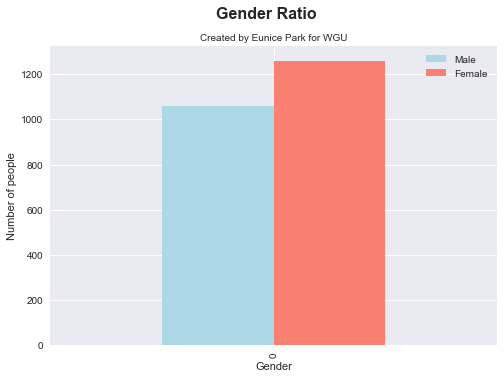

In [340]:
# SET STYLE
plt.style.use('seaborn')

# df["sex"].value_counts()
# 0 = 1058
# 1 = 1261
# {'male': 0, 'female': 1}

# Visualize gender ratio
# https://matplotlib.org/examples/color/named_colors.html

# df["sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

# plt.suptitle('Gender Ratio', fontsize=16, fontweight='bold')
# plt.title("Created by Eunice Park for WGU", fontsize=10)
# plt.xlabel("1 = Female, 0 = Male")
# plt.ylabel("Number of people")
# plt.legend(["Female", "Male"], loc='best');

#---
sex_df = pd.DataFrame(
    {
    'Male': 1058,
    'Female': 1261 
    }
    , index=[0]
)

sex_df.plot(kind="bar", color=["lightblue", "salmon"]);

plt.suptitle('Gender Ratio', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.legend(["Male", "Female"], loc='best');

Text(0.5, 1.0, 'Created by Eunice Park for WGU')

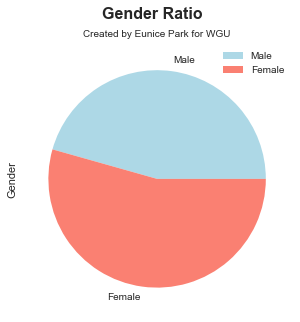

In [351]:
sex_df_pie = pd.DataFrame(
    {
    'Gender': [1058, 1261]
    }
    , index=['Male', 'Female']
)

plot = sex_df_pie.plot.pie(y='Gender', figsize=(5,5), colors=["lightblue", "salmon"])

plt.suptitle('Gender Ratio', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)

In [89]:
# Compare target column with sex column

pd.crosstab(df.state, df.sex)

sex,0,1
state,,
0,1038,1253
1,20,8


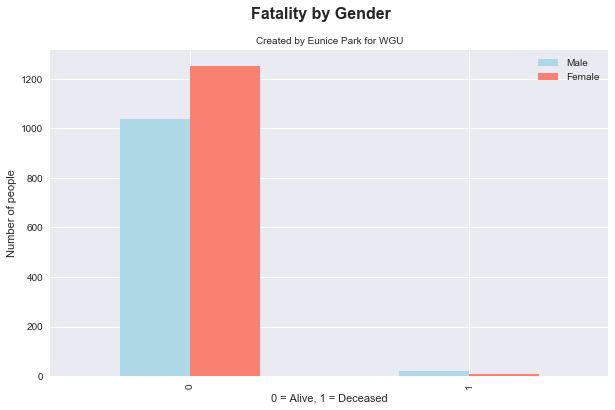

In [312]:
# Create a plot of crosstab
pd.crosstab(df.state, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["lightblue", "salmon"])

plt.suptitle('Fatality by Gender', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("0 = Alive, 1 = Deceased")
plt.ylabel("Number of people")
plt.legend(["Male", "Female"]);
# plt.xticks(rotation=0);


Text(0.5, 0, 'Ranges')

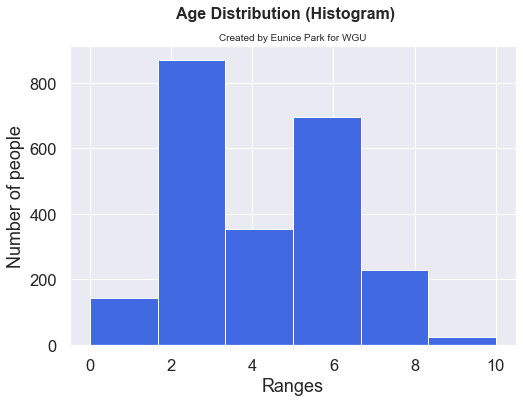

In [439]:
# Check the distribution of the age column with a histogram
# df.age.plot.hist();
df.age.plot.hist(color='royalblue', bins=6);

plt.suptitle('Age Distribution (Histogram)', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.ylabel("Number of people")
plt.xlabel("Ranges")

# plt.yticks(rotation=0);
# df["age"].plot.hist(bins=11);

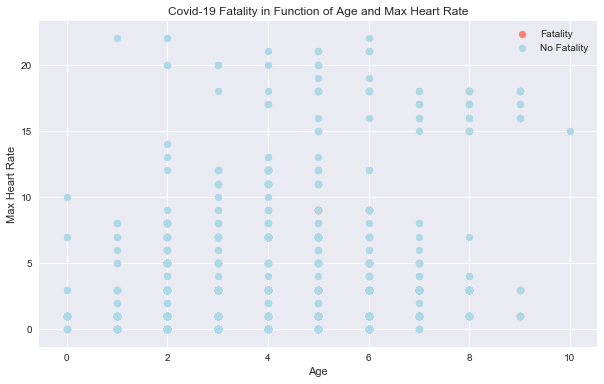

In [163]:
# Age vs Sex for Covid-19 Fatality

# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postive examples
plt.scatter(df.age[df.state==1],
            df.infection_case[df.state==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.state==0],
            df.infection_case[df.state==0],
            c="lightblue")

# Add some helpful info
plt.title("Covid-19 Fatality in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Fatality", "No Fatality"]);

In [179]:
# PROVINCE VALUE COUNTS
# {"0":500,"1":121,"2":14,"3":27,"4":87,"5":39,"6":42,"7":46,"8":634,"9":35,"10":44,"11":139,"12":17,"13":15,"14":436,"15":111,"16":12}


8     634
0     500
14    436
11    139
1     121
15    111
4      87
7      46
10     44
6      42
5      39
9      35
3      27
12     17
13     15
2      14
16     12
Name: province, dtype: int64

Text(0, 0.5, 'Number of People')

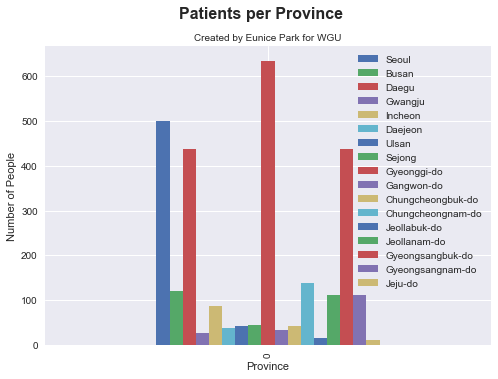

In [263]:
province_df = pd.DataFrame(
    {
  'Seoul': 500,
  'Busan': 121,
  'Daegu': 436,
  'Gwangju': 27,
  'Incheon': 87,
  'Daejeon': 39,
  'Ulsan': 42,
  'Sejong': 46,
  'Gyeonggi-do': 634,
  'Gangwon-do': 35,
  'Chungcheongbuk-do': 44,
  'Chungcheongnam-do': 139,
  'Jeollabuk-do': 17,
  'Jeollanam-do': 111,
  'Gyeongsangbuk-do': 436,
  'Gyeongsangnam-do': 111,
  'Jeju-do': 12
}
    , index=[0]
)

# df["province"].value_counts()
# {8: 634, 0: 500}

province_df.plot(kind="bar");

# ---

# --- 
plt.suptitle('Patients per Province', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Province")
plt.ylabel("Number of People")

# https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi

Text(0.5, 1.0, 'Created by Eunice Park for WGU')

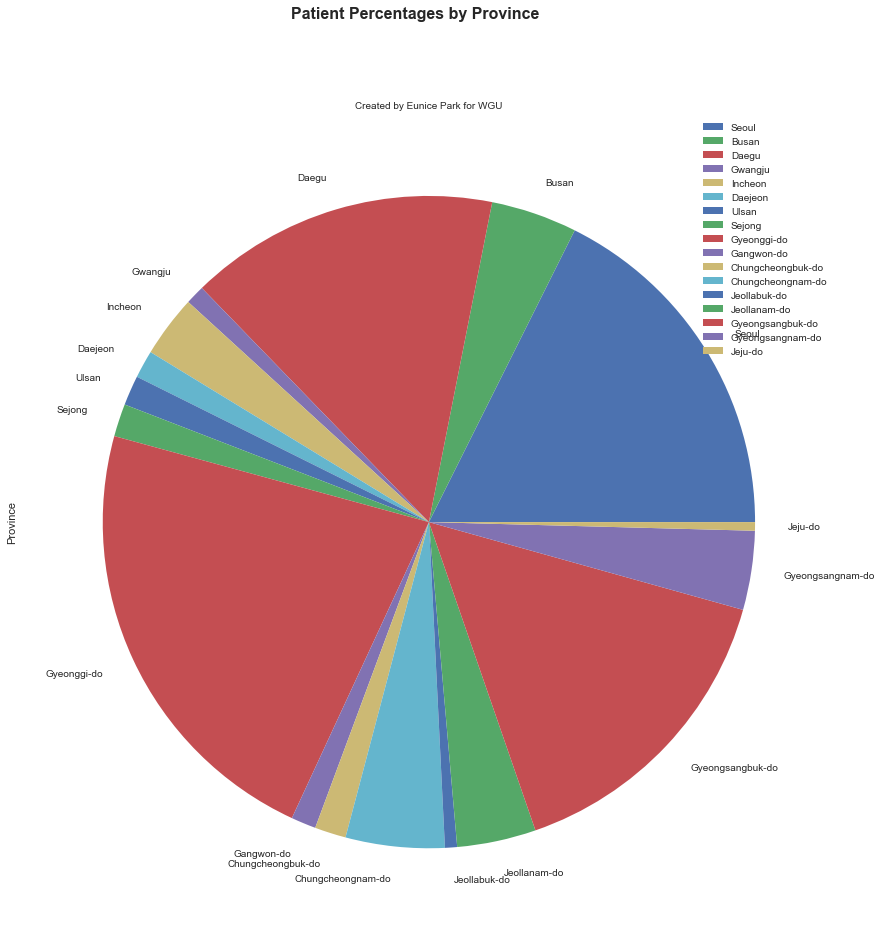

In [358]:
province_df_pie = pd.DataFrame(
    {
        'Province': [500,121,436,27,87,39,42,46,634,35,44,139,17,111,436,111,12]
    }
    , index=['Seoul','Busan','Daegu','Gwangju','Incheon','Daejeon','Ulsan','Sejong',
             'Gyeonggi-do','Gangwon-do','Chungcheongbuk-do','Chungcheongnam-do',
             'Jeollabuk-do','Jeollanam-do','Gyeongsangbuk-do','Gyeongsangnam-do','Jeju-do']
)

plot = province_df_pie.plot.pie( y='Province', figsize=(15,15) )

plt.suptitle('Patient Percentages by Province', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)

Text(0, 0.5, 'Number of People')

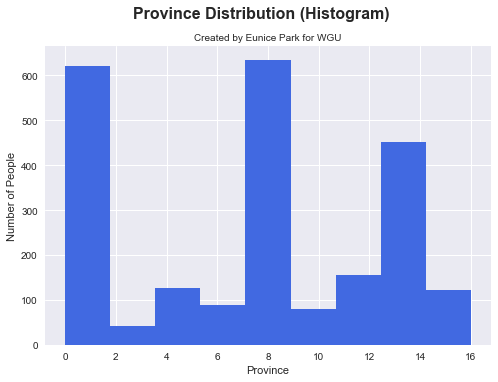

In [363]:
# df.province.plot.hist(color='royalblue');
df.province.plot.hist(color='royalblue', bins=9);

plt.suptitle('Province Distribution (Histogram)', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Province")
plt.ylabel("Number of People")

In [165]:
# Covid-19 Fatality Frequency per Province

pd.crosstab(df.province, df.state)

state,0,1
province,,
0,498,2
1,119,2
2,13,1
3,27,0
4,87,0
5,39,0
6,41,1
7,46,0
8,633,1


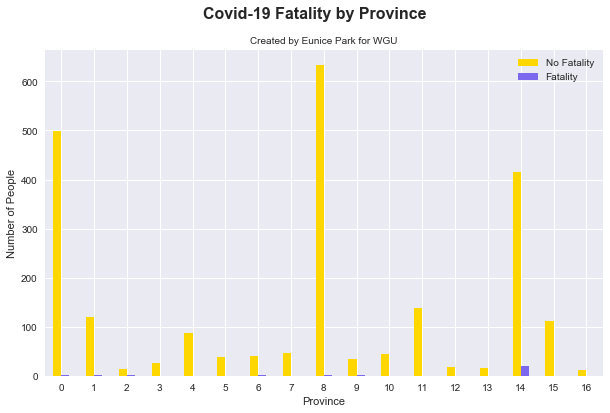

In [282]:
# Visualize crosstab
pd.crosstab(df.province, df.state).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["gold", "mediumslateblue"])

plt.suptitle('Covid-19 Fatality by Province', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Province")
plt.ylabel("Number of People")
plt.legend(["No Fatality", "Fatality"])
plt.xticks(rotation=0);

In [190]:
df["age"].value_counts()

2     533
5     417
4     355
3     337
6     280
7     138
1     102
8      92
0      40
9      24
10      1
Name: age, dtype: int64

Text(0.5, 0, 'Ranges')

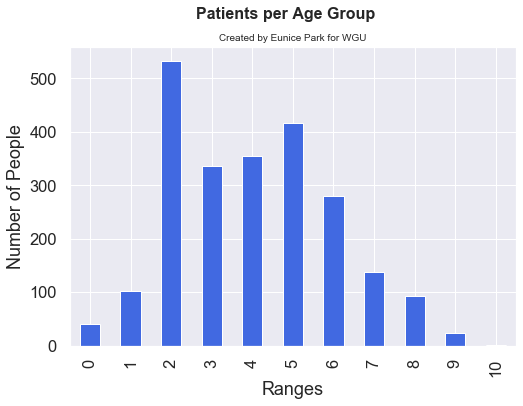

In [438]:
# Pandas Dataframe: Plot Examples with Matplotlib and Pyplot
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

# age_df = pd.DataFrame(
#     {
#   '0s': 40,
#   '10s': 102,
#   '20s': 533,
#   '30s': 337,
#   '40s': 355,
#   '50s': 417,
#   '60s': 280,
#   '70s': 138,
#   '80s': 92,
#   '90s': 24,
#   '100s': 1  
#     }
#     , index=[0]
# )

# age_df

#---
# age_df.plot(kind="bar")

#---
age_series = pd.Series([40, 102, 533, 337, 355, 417, 280, 138, 92, 24, 1])
age_series.plot(kind="bar", color="royalblue")

# ---
plt.suptitle('Patients per Age Group', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Age Groups: 0 = < 10, 1 = teens, 2 = twenties, 3 = thirties, etc")
plt.ylabel("Number of People")

In [169]:
# Covid-19 Fatality Frequency per Age Group

pd.crosstab(df.age, df.state)

state,0,1
age,,
0,40,0
1,102,0
2,533,0
3,336,1
4,353,2
5,413,4
6,276,4
7,130,8
8,86,6


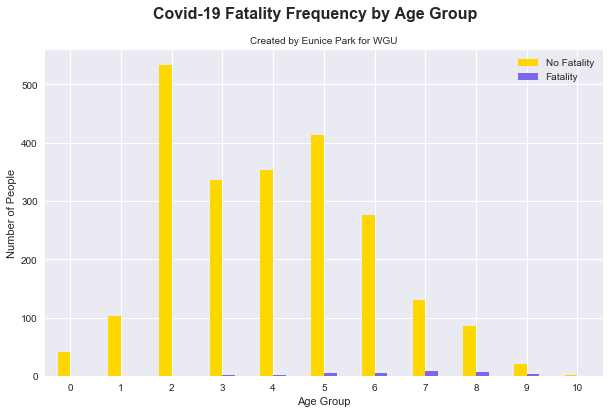

In [283]:
pd.crosstab(df.age, df.state).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["gold", "mediumslateblue"])

plt.suptitle('Covid-19 Fatality Frequency by Age Group', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.legend(["No Fatality", "Fatality"])
plt.xticks(rotation=0);

In [286]:
# df["infection_case"].value_counts()
# {"0":460,"1":881,"2":13,"3":507,"4":16,"5":103,"6":17,"7":112,"8":33,"9":21,"10":3,"11":28,"12":30,"13":4,"14":1,"15":14,"16":10,"17":12,"18":31,"19":2,"20":11,"21":6,"22":4}

Text(0, 0.5, 'Number of people')

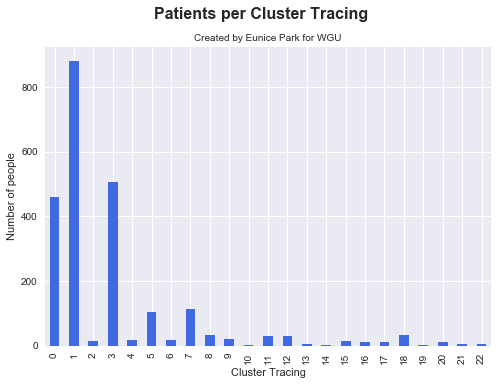

In [333]:
# df["infection_case"].value_counts().plot(kind="bar", color="royalblue");

infection_case_series = pd.Series([
  460, 881, 13, 507, 16, 103, 17, 112,
   33,  21,  3,  28, 30,   4,  1,  14,
   10,  12, 31,   2, 11,   6,  4
])

infection_case_series.plot(kind="bar", color="royalblue")

plt.suptitle('Patients per Cluster Tracing', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Cluster Tracing")
plt.ylabel("Number of people")
# plt.legend(["Female", "Male"], loc='best');

Text(0, 0.5, 'Number of people')

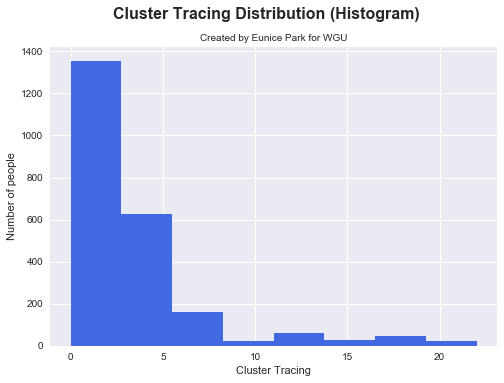

In [364]:
df.infection_case.plot.hist(color='royalblue', bins=8);
plt.suptitle('Cluster Tracing Distribution (Histogram)', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU", fontsize=10)
plt.xlabel("Cluster Tracing")
plt.ylabel("Number of people")

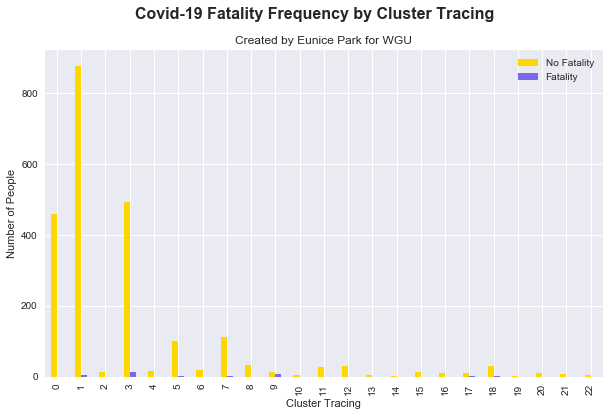

In [331]:
pd.crosstab(df.infection_case, df.state).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["gold", "mediumslateblue"]);

plt.suptitle('Covid-19 Fatality Frequency by Cluster Tracing', fontsize=16, fontweight='bold')
plt.title("Created by Eunice Park for WGU")
plt.xlabel("Cluster Tracing")
plt.ylabel("Number of People")
plt.legend(["No Fatality", "Fatality"])


In [271]:
# DROP PATIENT_ID
df = df.drop("patient_id", axis=1)

# Make a correlation matrix
df.corr()

,sex,age,country,province,infection_case,state
sex,1.000000,0.098165,-0.034476,0.018386,0.091549,-0.057277
age,0.098165,1.000000,-0.047645,0.168662,0.217152,0.148635
country,-0.034476,-0.047645,1.000000,-0.027984,-0.045272,0.075367
province,0.018386,0.168662,-0.027984,1.000000,0.184090,0.075821
infection_case,0.091549,0.217152,-0.045272,0.184090,1.000000,0.075459
state,-0.057277,0.148635,0.075367,0.075821,0.075459,1.000000


Text(0.5, 0.98, 'Correlation Matrix')

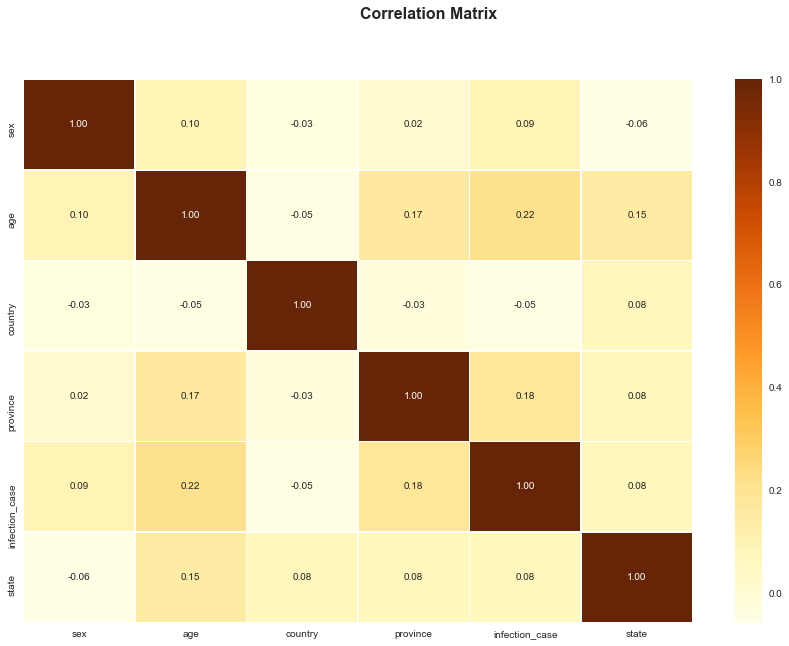

In [327]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlOrBr"
#                  cmap="YlGnBu"
                );

fig.suptitle('Correlation Matrix', fontsize=16, fontweight='bold')

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

## MODELING - FIT MODEL TO DATA

In [304]:
# Split data into X and y

# Table with all columns except `state` column
X = df.drop("state", axis=1)

# Table with only `state` column
y = df["state"]

In [307]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# X_train
# X_test
# y_train
# y_test

In [308]:
X_train

,sex,age,country,province,infection_case
1853,1,2,0,11,1
2504,1,8,0,14,3
2815,1,8,0,14,3
1336,0,3,0,8,0
3131,0,4,0,15,1
...,...,...,...,...,...
1801,1,2,0,11,1
1256,1,3,0,8,1
1291,1,5,0,8,1
1455,1,9,0,8,1


In [309]:
y_train, len(y_train)

(1853    0
 2504    1
 2815    0
 1336    0
 3131    0
        ..
 1801    0
 1256    0
 1291    0
 1455    0
 1021    0
 Name: state, Length: 1855, dtype: int64,
 1855)

Try three machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [310]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Instantiate and fit the model to the data
        model.fit(X_train, y_train) # fit = training dataset
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test) # score = test dataset
    
    # Return model_scores object
    return model_scores

# Example of instantiating and fitting model
# model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [311]:
# Call the function we created
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9913793103448276,
 'KNN': 0.9892241379310345,
 'Random Forest': 0.9892241379310345}

### Model Comparison

## IMPROVING MODEL

Selected logistic regression model

### Tune hyperparameters manually

### Tune hyperparameters with RandomizedSearchCV

### Tune hyperparameters with GridSearchCV

In [334]:
# Tune our logistic regression model

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train); # <--- Train the model created with GridSearchCV()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


In [335]:
# Check the best hyperparameters
gs_log_reg.best_params_ # <--- Find GridSearchCV model's best parameters

{'C': 0.0001, 'solver': 'liblinear'}

In [336]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.9913793103448276

## Evaluating our tuned machine learning classifier, beyond accuracy

In [367]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test) # <--- 

In [368]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [369]:
y_test

1286    0
658     0
100     0
999     0
251     0
       ..
1264    0
3148    0
1654    0
1688    0
1615    0
Name: state, Length: 464, dtype: int64

Text(0.5, 1.0, 'ROC Curve')

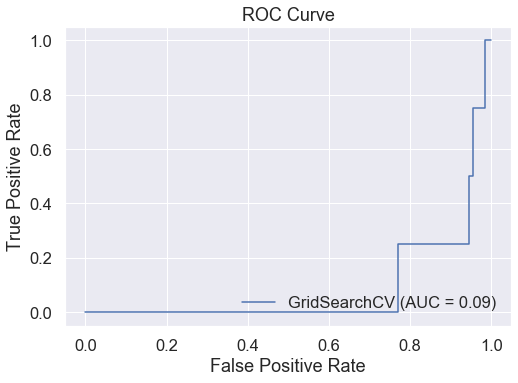

In [375]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

plt.title("ROC Curve")

In [371]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[460   0]
 [  4   0]]


Text(0.5, 1, 'Confusion Matrix')

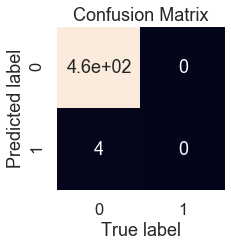

In [376]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

plt.title("Confusion Matrix")

In [374]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       460
           1       0.00      0.00      0.00         4

    accuracy                           0.99       464
   macro avg       0.50      0.50      0.50       464
weighted avg       0.98      0.99      0.99       464



/Users/eunice/github/ml-ds-js/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Calculate evaluation metrics using cross-validation

In [377]:
# Once again, check grid search LogisticRegression model's best hyperparameters 

gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [390]:
# Create a new classifier with best parameters ⬆️

clf = LogisticRegression(C=0.0001,             # <--- Instantiate new model
                         solver="liblinear")

# clf = LogisticRegression(C=0.20433597178569418,
#                          solver="liblinear")

In [391]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.98922414, 0.98706897, 0.98706897, 0.98706897, 0.98920086])

In [392]:
cv_acc = np.mean(cv_acc)

cv_acc

0.9879263796827287

In [382]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision=np.mean(cv_precision)
cv_precision

/Users/eunice/github/ml-ds-js/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunice/github/ml-ds-js/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunice/github/ml-ds-js/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunice/github/ml-ds-js/env/lib/python3.8/site-packages

0.0

In [393]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.0

In [394]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.0

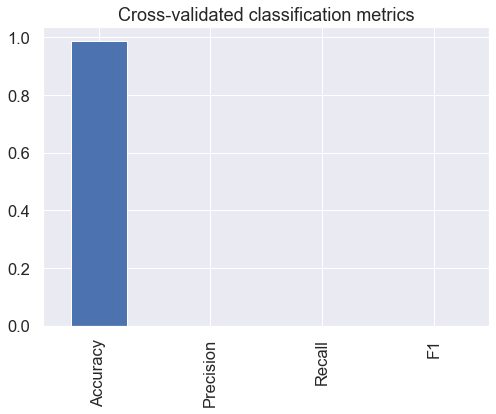

In [395]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

In [412]:
# Once again, create a new logistic regression classifer model with best parameters
clf = LogisticRegression(C=0.34528394,
                         solver="liblinear")

# Fit an instance of LogisticRegression
clf.fit(X_train, y_train);

In [413]:
# Check coef_
clf.coef_

array([[-1.26459402,  0.12942097,  0.36609125, -0.02434418,  0.05287095]])

In [414]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

feature_dict

{'sex': -1.2645940163538463,
 'age': 0.1294209707623121,
 'country': 0.3660912491188301,
 'province': -0.02434418211856252,
 'infection_case': 0.0528709526828856}

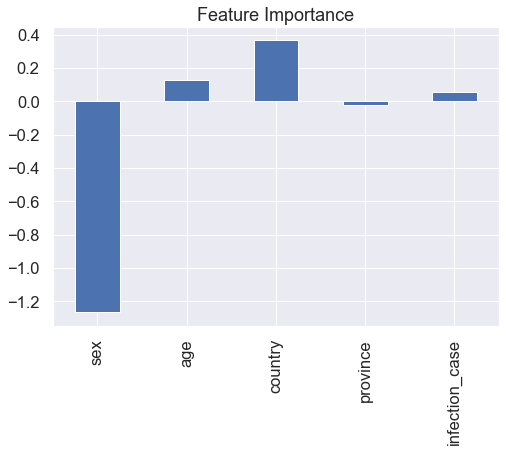

In [415]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title="Feature Importance", legend=False)

## Save and load trained machine learning model

(scikit-learn)

**Pickle method**

In [416]:
import pickle

# Save model to a pickle file
pickle.dump(clf, open("gs_logistic_regression_model_1.pkl", "wb"))
# wb - write binary

In [417]:
# Load model in pickle file
loaded_pickle_model = pickle.load(open("gs_logistic_regression_model_1.pkl", "rb"))
# rb - read binary

In [421]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [422]:
# Make prediction
pickle_y_preds = loaded_pickle_model.predict(X_test)

# Compare pickle predictions with test predictions
evaluate_preds(y_test, pickle_y_preds)

Acc: 99.14%
Precision: 0.00
Recall: 0.00
F1 score: 0.00


/Users/eunice/github/ml-ds-js/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.99, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

### CHECK PROBABILITIES OF A CLASSIFICATION LABEL

In [428]:
# CHECK PROBABILITIES OF A CLASSIFICATION LABEL

# clf.predict_proba(X_test)

# See first 5
clf.predict_proba(X_test[:5])


array([[0.99140095, 0.00859905],
       [0.98863519, 0.01136481],
       [0.99375927, 0.00624073],
       [0.96619599, 0.03380401],
       [0.96896822, 0.03103178]])

In [427]:
# Predict on the same data
clf.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [429]:
X_test.head(5)

,sex,age,country,province,infection_case
1286,1,5,0,8,1
658,1,3,0,1,8
100,1,1,0,0,1
999,0,5,0,7,3
251,0,3,0,0,3


In [432]:
test_df = pd.DataFrame(
            [[0, 6, 0, 0, 0]],
            columns=["sex", "age", "country", "province", "infection_case"],
            dtype=int,
            index=["input"],
        )
test_df

,sex,age,country,province,infection_case
input,0,6,0,0,0


In [433]:
clf.predict(test_df)

array([0])

In [441]:
df['infection_case'].value_counts()

1     881
3     507
0     460
7     112
5     103
8      33
18     31
12     30
11     28
9      21
6      17
4      16
15     14
2      13
17     12
20     11
16     10
21      6
13      4
22      4
10      3
19      2
14      1
Name: infection_case, dtype: int64

In [440]:
pd.crosstab(df.infection_case, df.state)

state,0,1
infection_case,,
0,460,0
1,878,3
2,13,0
3,494,13
4,16,0
5,101,2
6,17,0
7,111,1
8,33,0
